1) Бизнес цели - опредение наличия заболивания у человека

2) Подготовка данных

In [171]:
import matplotlib.pyplot as plt
import pandas as pd
from prompt_toolkit.shortcuts.progress_bar import Percentage

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(df.columns)
print(df)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Fem

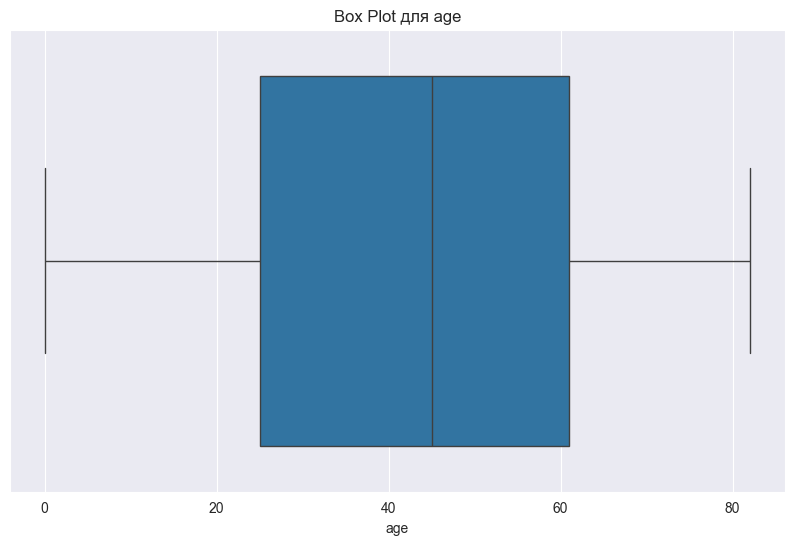

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot для age')
plt.xlabel('age')
plt.show()

In [173]:
import pandas as pd

# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

bmi процент пустых значений: %3.93


In [174]:
# Замена пустых данных на медиану
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

3) Унитарное кодирование

In [175]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = OneHotEncoder(sparse_output=False, drop="first")

df = df[["age", "gender", "hypertension", "work_type", "avg_glucose_level", "bmi", "smoking_status"]]
df = df.query('gender == "Male" or gender == "Female"')
encoded_values = encoder.fit_transform(df[["gender", "work_type", "smoking_status"]])

encoded_columns = encoder.get_feature_names_out(["gender", "work_type", "smoking_status"])

encoded_values_df = pd.DataFrame(encoded_values, columns=encoded_columns)

df = pd.concat([df, encoded_values_df], axis=1)

df

age  gender  hypertension      work_type  avg_glucose_level   bmi  \
0     67.0    Male           0.0        Private             228.69  36.6   
1     61.0  Female           0.0  Self-employed             202.21  28.1   
2     80.0    Male           0.0        Private             105.92  32.5   
3     49.0  Female           0.0        Private             171.23  34.4   
4     79.0  Female           1.0  Self-employed             174.12  24.0   
...    ...     ...           ...            ...                ...   ...   
5106  81.0  Female           0.0  Self-employed             125.20  40.0   
5107  35.0  Female           0.0  Self-employed              82.99  30.6   
5108  51.0    Male           0.0        Private             166.29  25.6   
5109  44.0  Female           0.0       Govt_job              85.28  26.2   
3116   NaN     NaN           NaN            NaN                NaN   NaN   

       smoking_status  gender_Male  work_type_Never_worked  work_type_Private  \
0     formerly smoked          1.0                     0.0                1.0   
1        never smoked          0.0                     0.0                0.0   
2        never smoked          1.0                     0.0                1.0   
3              smokes          0.0                     0.0                1.0   
4        never smoked          0.0                     0.0                0.0   
...               ...          ...                     ...                ...   
5106     never smoked          0.0                     0.0                0.0   
5107     never smoked          1.0                     0.0                1.0   
5108  formerly smoked          0.0                     0.0                0.0   
5109          Unknown          NaN                     NaN                NaN   
3116              NaN          0.0                     0.0                0.0   

      work_type_Self-employed  work_type_children  \
0                         0.0                 0.0   
1                         1.0                 0.0   
2                         0.0                 0.0   
3                         0.0                 0.0   
4                         1.0                 0.0   
...                       ...                 ...   
5106                      1.0                 0.0   
5107                      0.0                 0.0   
5108                      0.0                 0.0   
5109                      NaN                 NaN   
3116                      0.0                 1.0   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                                1.0                          0.0   
1                                0.0                          1.0   
2                                0.0                          1.0   
3                                0.0                          0.0   
4                                0.0                          1.0   
...                              ...                          ...   
5106                             0.0                          1.0   
5107                             1.0                          0.0   
5108                             0.0                          0.0   
5109                             NaN                          NaN   
3116                             0.0                          0.0   

      smoking_status_smokes  
0                       0.0  
1                       0.0  
2                       0.0  
3                       1.0  
4                       0.0  
...                     ...  
5106                    0.0  
5107                    0.0  
5108                    0.0  
5109                    NaN  
3116                    0.0  

[5110 rows x 15 columns]

4) Дискретизация признаков

In [176]:
df["age"] = pd.qcut(df["age"], q=5, labels=False)
df

age  gender  hypertension      work_type  avg_glucose_level   bmi  \
0     4.0    Male           0.0        Private             228.69  36.6   
1     3.0  Female           0.0  Self-employed             202.21  28.1   
2     4.0    Male           0.0        Private             105.92  32.5   
3     2.0  Female           0.0        Private             171.23  34.4   
4     4.0  Female           1.0  Self-employed             174.12  24.0   
...   ...     ...           ...            ...                ...   ...   
5106  4.0  Female           0.0  Self-employed             125.20  40.0   
5107  1.0  Female           0.0  Self-employed              82.99  30.6   
5108  2.0    Male           0.0        Private             166.29  25.6   
5109  2.0  Female           0.0       Govt_job              85.28  26.2   
3116  NaN     NaN           NaN            NaN                NaN   NaN   

       smoking_status  gender_Male  work_type_Never_worked  work_type_Private  \
0     formerly smoked          1.0                     0.0                1.0   
1        never smoked          0.0                     0.0                0.0   
2        never smoked          1.0                     0.0                1.0   
3              smokes          0.0                     0.0                1.0   
4        never smoked          0.0                     0.0                0.0   
...               ...          ...                     ...                ...   
5106     never smoked          0.0                     0.0                0.0   
5107     never smoked          1.0                     0.0                1.0   
5108  formerly smoked          0.0                     0.0                0.0   
5109          Unknown          NaN                     NaN                NaN   
3116              NaN          0.0                     0.0                0.0   

      work_type_Self-employed  work_type_children  \
0                         0.0                 0.0   
1                         1.0                 0.0   
2                         0.0                 0.0   
3                         0.0                 0.0   
4                         1.0                 0.0   
...                       ...                 ...   
5106                      1.0                 0.0   
5107                      0.0                 0.0   
5108                      0.0                 0.0   
5109                      NaN                 NaN   
3116                      0.0                 1.0   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                                1.0                          0.0   
1                                0.0                          1.0   
2                                0.0                          1.0   
3                                0.0                          0.0   
4                                0.0                          1.0   
...                              ...                          ...   
5106                             0.0                          1.0   
5107                             1.0                          0.0   
5108                             0.0                          0.0   
5109                             NaN                          NaN   
3116                             0.0                          0.0   

      smoking_status_smokes  
0                       0.0  
1                       0.0  
2                       0.0  
3                       1.0  
4                       0.0  
...                     ...  
5106                    0.0  
5107                    0.0  
5108                    0.0  
5109                    NaN  
3116                    0.0  

[5110 rows x 15 columns]

3) Разбиение данных

In [177]:
# Функция для создания выборок
from sklearn.model_selection import train_test_split
dropna_df = df.dropna()

df_input = dropna_df[[
    "age",
    "hypertension", 
    "avg_glucose_level", 
    "bmi", 
    "gender_Male",
    "work_type_Never_worked",
    "work_type_Private",
    "work_type_Self-employed",
    "work_type_children",
    "smoking_status_formerly smoked",
    "smoking_status_never smoked",
    "smoking_status_smokes",
]]

print(df_input.head())

train_df, temp_df = train_test_split(df_input, test_size=0.4, random_state=42)

# Разделение остатка на контрольную и тестовую выборки
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Проверка размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Сохранение выборок в файлы
train_df.to_csv(".//static//csv//train_data.csv", index=False)
val_df.to_csv(".//static//csv//val_data.csv", index=False)
test_df.to_csv(".//static//csv//test_data.csv", index=False)

   age  hypertension  avg_glucose_level   bmi  gender_Male  \
0  4.0           0.0             228.69  36.6          1.0   
1  3.0           0.0             202.21  28.1          0.0   
2  4.0           0.0             105.92  32.5          1.0   
3  2.0           0.0             171.23  34.4          0.0   
4  4.0           1.0             174.12  24.0          0.0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                     0.0                1.0                      0.0   
1                     0.0                0.0                      1.0   
2                     0.0                1.0                      0.0   
3                     0.0                1.0                      0.0   
4                     0.0                0.0                      1.0   

   work_type_children  smoking_status_formerly smoked  \
0                 0.0                             1.0   
1                 0.0                             0.0   
2                

In [178]:
train_df = pd.read_csv(".//static//csv//train_data.csv")
val_df = pd.read_csv(".//static//csv//val_data.csv")
test_df = pd.read_csv(".//static//csv//test_data.csv")

def check_balance(df, name):
    print(f"Распределение gender в {name}:")
    print(f"Процент gender_Male: {df["gender_Male"].value_counts()[1.0] / len(df) * 100:.2f}%")
    print(f"Процент gender_Female: {(len(df) - df["gender_Male"].value_counts()[1.0]) / len(df) * 100:.2f}%")
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение gender в обучающей выборке:
Процент gender_Male: 41.87%
Процент gender_Female: 58.13%

Распределение gender в контрольной выборке:
Процент gender_Male: 40.41%
Процент gender_Female: 59.59%

Распределение gender в тестовой выборке:
Процент gender_Male: 41.00%
Процент gender_Female: 59.00%



Выборка сбалансирована